# A brief tour of the jupyter notebook

This document will give you a brief tour of the capabilities of running Ipython in the jupyter notebook.  
You can view its contents by scrolling around, or execute each cell by typing `Shift-Enter`.
After you conclude this brief high-level tour, you should read the accompanying notebook 
titled `01_notebook_introduction`, which takes a more step-by-step approach to the features of the
system.  

---

You can run shell aliases and magic commands:

In [4]:
pwd

u'/net/san-a1-ib/data/keeling/a/snesbitt/python/pyradartutorials/00_introduction'

In [5]:
ls

investigating_the_py-art_radar_object.ipynb  notebook_tour.ipynb


In [6]:
message = 'The Jupyter notebook is great!'
# note: the echo command does not run on Windows, it's a unix command.
!echo $message

The Jupyter notebook is great!


Plots with matplotlib: do **not** execute the next below if you do not have matplotlib installed or didn't call the `%matplotib` magic, as the code will not work.

In [7]:
%matplotlib inline

/data/keeling/a/snesbitt/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


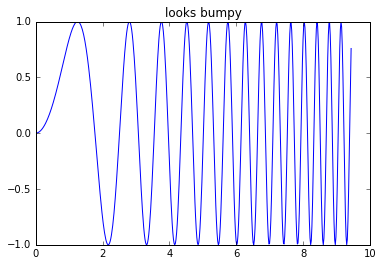

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 3*np.pi, 500)      #linspace gives us 500 equally spaced numbers between 0 and 3*pi
plt.plot(x, np.sin(x**2))
plt.title('looks bumpy');


You can paste blocks of input with prompt markers, such as those from
[the official Python tutorial](http://docs.python.org/tutorial/interpreter.html#interactive-mode)

In [10]:
>>> the_world_is_flat = 1
>>> if the_world_is_flat:
...     print("Be careful not to fall off!")

Be careful not to fall off!


### Errors
Errors are shown in informative ways:

In [11]:
%run non_existent_file

ERROR:root:File `u'non_existent_file.py'` not found.


In [12]:
x = 1
y = 4
z = y/(1-x)

ZeroDivisionError: integer division or modulo by zero

In [13]:
print(1-x)

0


When IPython needs to display additional information (such as providing details on an object via `x?`
it will automatically invoke a pager at the bottom of the screen:

In [14]:
magic

## Non-blocking output of kernel

If you execute the next cell, you will see the output arriving as it is generated, not all at the end.

In [2]:
import time, sys
for i in range(8):
    print(i),
    time.sleep(0.5)

0 1 2 3 4 5 6 7


## Clean crash and restart

We call the low-level system libc.time routine with the wrong argument via
ctypes to segfault the Python interpreter:

In [ ]:
from ctypes import CDLL
# This will crash a linux system; equivalent calls can be made on Windows or Mac
libc = CDLL("libc.so.6") 
libc.time(-1)  # BOOM!!

## Markdown cells can contain formatted text and code

You can *italicize*, **boldface**

* build
* lists

and embed code meant for illustration instead of execution in Python:

    def f(x):
        """a docstring"""
        return x**2

or other languages:

    if (i=0; i<n; i++) {
      printf("hello %d\n", i);
      x += 4;
    }

Courtesy of MathJax, you can include mathematical expressions both inline: 
$e^{i\pi} + 1 = 0$  and displayed:

$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

## Rich displays: include anyting a browser can show

Note that we have an actual protocol for this, see the `display_protocol` notebook for further details.

### Images

In [3]:
from IPython.core.display import Image
Image(filename='../data/nyan-cat.png')

IOError: [Errno 2] No such file or directory: u'../data/nyan-cat.png'

An image can also be displayed from raw data or a url

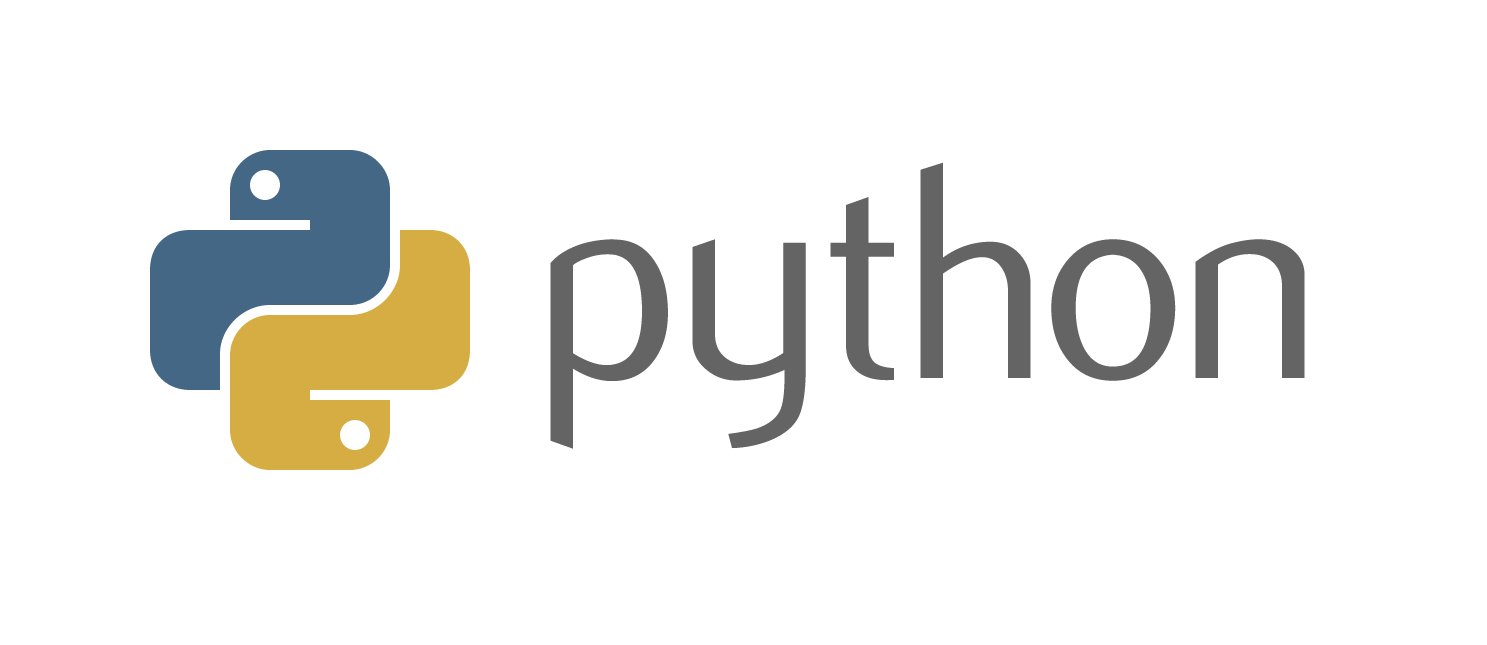

In [4]:
Image('https://www.zopyx.com/resources/python-logo-master.png')

### Video

And more exotic objects can also be displayed, as long as their representation supports 
the IPython display protocol.

For example, videos hosted externally on YouTube are easy to load (and writing a similar wrapper for other
hosted content is trivial):

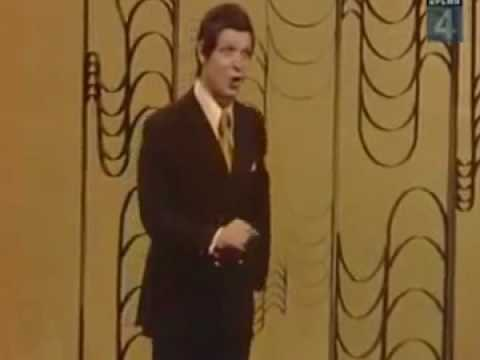

In [5]:
from IPython.lib.display import YouTubeVideo

YouTubeVideo('32UGD0fV45g')

### Mathematics

And we also support the display of mathematical expressions typeset in LaTeX, which is rendered
in the browser thanks to the [MathJax library](http://mathjax.org).  

Note that this is *different* from the above examples.  Above we were typing mathematical expressions
in Markdown cells (along with normal text) and letting the browser render them; now we are displaying
the output of a Python computation as a LaTeX expression wrapped by the `Math()` object so the browser
renders it:

In [6]:
from IPython.core.display import Math
Math(r'$F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx$')

<IPython.core.display.Math object>

# Loading external codes
* Drag and drop a ``.py`` in the dashboard
* Use ``%loadpy`` with any local or remote url: [the Matplotlib Gallery!](http://matplotlib.sourceforge.net/gallery.html)

In this notebook we've kept the output saved so you can see the result, but you should run the next
cell yourself (with an active internet connection).

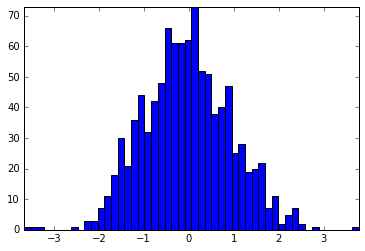

In [8]:
# %load http://matplotlib.org/mpl_examples/api/histogram_path_demo.py
"""
========================================================
Building histograms using Rectangles and PolyCollections
========================================================

This example shows how to use a path patch to draw a bunch of
rectangles.  The technique of using lots of Rectangle instances, or
the faster method of using PolyCollections, were implemented before we
had proper paths with moveto/lineto, closepoly etc in mpl.  Now that
we have them, we can draw collections of regularly shaped objects with
homogeneous properties more efficiently with a PathCollection.  This
example makes a histogram -- its more work to set up the vertex arrays
at the outset, but it should be much faster for large numbers of
objects
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

fig, ax = plt.subplots()

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 50)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n


# we need a (numrects x numsides x 2) numpy array for the path helper
# function to build a compound path
XY = np.array([[left, left, right, right], [bottom, top, top, bottom]]).T

# get the Path object
barpath = path.Path.make_compound_path_from_polys(XY)

# make a patch out of it
patch = patches.PathPatch(barpath)
ax.add_patch(patch)

# update the view limits
ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

plt.show()
